<a href="https://colab.research.google.com/github/robinorex/Machine-Learning-Project/blob/main/Copy_of_data_science_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science Practical Test**
## Instructions
Analyse and use a machine learning model with the Amazon Kindle reviews data provided. You may decide what to do with the data as long as the following criterias are met:


1. Define the aim of the project
2. Use a machine learning model
3. Assess the quality of the model with appropriate metric(s)
4. Use any visualisation as appropriate
5. Write succinct documentation
6. Explain your thought process/justify your decisions
7. All work, including any pre-processing, must be done in this notebook
8. Must use Python


## Rules
* Email completed project to leo.mooney@partly.com, joana@partly.com and cc dan@partly.com
* Any submission after the deadline will be discounted
* Copying from any existing project is not allowed




# Data
Download the data here: https://drive.google.com/file/d/1bXotNR-Rwvlim89LZkii62wS4HKm2ceX/view?usp=sharing

The provided data is a sample of 982,619 reviews from the Amazon Kindle store.

Columns:
* `reviewerID` - ID of the reviewer, e.g. A2SUAM1J3GNN3B
* `asin` - ID of the product, e.g. 0000013714
* `reviewerName` - name of the reviewer
* `helpful` - helpfulness rating of the review, format: [number of positive helpfulness ratings, total number of helpfulness ratings]. i.e. [2, 3] means 3 people rated the review, 2 people found it helpful and 1 found it unhelpful.
* `reviewText` - text of the review
* `overall` - rating of the product
* `summary` - summary of the review
* `unixReviewTime` - time of the review (unix time)
* `reviewTime` - time of the review (raw)

In [ ]:
# Aim of the Project:
# The aim of this project is to develop a machine learning model that can predict the sentiment of Amazon Kindle
# reviews as positive or negative. This can help Amazon and sellers understand customer feedback and improve
# their products and services.


In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/My Drive/Colab Notebooks/review_Kindle_Store.csv'
df = pd.read_csv(file_path)

df.head()


,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,"[0, 0]",I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014"
1,AN0N05A9LIJEQ,B000F83SZQ,critters,"[2, 2]",This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014"
2,A795DMNCJILA6,B000F83SZQ,dot,"[2, 2]",This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014"
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""","[1, 1]",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014"
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"[0, 1]","If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014"


In [81]:
df.shape

(982619, 9)

In [ ]:
# Handle the missing values as it dosen't provide useful information.
# The helpful column is in a string format and needs to be processed.

In [82]:
df.isnull().sum()

reviewerID           0
asin                 0
reviewerName      3822
helpful              0
reviewText          22
overall              0
summary            119
unixReviewTime       0
reviewTime           0
dtype: int64

In [83]:
# Drop rows with missing on review text
df = df.dropna(subset=['reviewText'])
# Check for remaining missing values
df.isnull().sum()


reviewerID           0
asin                 0
reviewerName      3822
helpful              0
reviewText           0
overall              0
summary            119
unixReviewTime       0
reviewTime           0
dtype: int64

In [84]:
df['helpful'].head()

0    [0, 0]
1    [2, 2]
2    [2, 2]
3    [1, 1]
4    [0, 1]
Name: helpful, dtype: object

In [ ]:
# Convert the helpful column from a string to a more useful
# format such as two separate columns: helpful_votes and total_votes.

In [85]:
import ast

# Convert the helpful column to a tuple of integers
df['helpful'] = df['helpful'].apply(lambda x: ast.literal_eval(x))

# Create two new columns: helpful_votes and total_votes
df['helpful_votes'] = df['helpful'].apply(lambda x: x[0])
df['total_votes'] = df['helpful'].apply(lambda x: x[1])

# Drop the original helpful column
df = df.drop(columns=['helpful'])

In [90]:
# Convert Ratings to Sentiment: Create a binary sentiment column where ratings 4
# and 5 are positive, and ratings 1, 2, and 3 are negative.
# Create a binary sentiment column
df['sentiment'] = df['overall'].apply(lambda x: 1 if x >= 4 else 0)

# Display the updated dataframe
df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_votes,total_votes,processed_review,sentiment
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014",0,0,enjoy vintage books movies enjoyed reading boo...,1
1,AN0N05A9LIJEQ,B000F83SZQ,critters,This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014",2,2,book reissue old one author born 1910 era say ...,1
2,A795DMNCJILA6,B000F83SZQ,dot,This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014",2,2,fairly interesting read old style terminologyi...,1
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014",1,1,id never read amy brewster mysteries one reall...,1
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014",0,1,like period pieces clothing lingo enjoy myster...,1


In [91]:
# Text Preprocessing: Tokenize, remove stopwords, and perform other necessary text
# preprocessing steps on the reviewText column.
import re

# Function to preprocess text
def preprocess_text_alternative(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text).lower()
    # Tokenize and remove stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Define a simple list of stopwords for demonstration
stop_words = set([
    'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
    'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself',
    'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them',
    'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this',
    'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing',
    'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until',
    'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between',
    'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to',
    'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again',
    'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
    'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than',
    'too', 'very', 's', 't', 'can', 'will', 'just', 'don', 'should', 'now'
])

# Apply the alternative preprocessing function to the reviewText column
df['processed_review'] = df['reviewText'].apply(preprocess_text_alternative)

# Display the updated dataframe
df.head()

,reviewerID,asin,reviewerName,reviewText,overall,summary,unixReviewTime,reviewTime,helpful_votes,total_votes,processed_review,sentiment
0,A1F6404F1VG29J,B000F83SZQ,Avidreader,I enjoy vintage books and movies so I enjoyed ...,5.0,Nice vintage story,1399248000,"05 5, 2014",0,0,enjoy vintage books movies enjoyed reading boo...,1
1,AN0N05A9LIJEQ,B000F83SZQ,critters,This book is a reissue of an old one; the auth...,4.0,Different...,1388966400,"01 6, 2014",2,2,book reissue old one author born 1910 era say ...,1
2,A795DMNCJILA6,B000F83SZQ,dot,This was a fairly interesting read. It had ol...,4.0,Oldie,1396569600,"04 4, 2014",2,2,fairly interesting read old style terminologyi...,1
3,A1FV0SX13TWVXQ,B000F83SZQ,"Elaine H. Turley ""Montana Songbird""",I'd never read any of the Amy Brewster mysteri...,5.0,I really liked it.,1392768000,"02 19, 2014",1,1,id never read amy brewster mysteries one reall...,1
4,A3SPTOKDG7WBLN,B000F83SZQ,Father Dowling Fan,"If you like period pieces - clothing, lingo, y...",4.0,Period Mystery,1395187200,"03 19, 2014",0,1,like period pieces clothing lingo enjoy myster...,1


In [ ]:
# Short Summary on data preprocessing
# Missing values in reviewText have been handled by dropping rows with missing values.
# The helpful column has been converted into helpful_votes and total_votes.
# A new binary sentiment column has been created based on the overall rating.
# Text preprocessing has been performed on the reviewText column to remove punctuation and stopwords.

In [ ]:
# Now I will use TF-IDF (term frequency–inverse document frequency) vectorizer
# to convert the processed review text into numerical features.

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the processed reviews into TF-IDF features
X = tfidf_vectorizer.fit_transform(df['processed_review'])

# Define the target variable
y = df['sentiment']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

# The processed reviews have been converted into numerical features using the TF-IDF
# vectorizer with a maximum of 5000 features.The data has been split into 786,077 training
# and 196,520 testing sets.

((786077, 5000), (196520, 5000), (786077,), (196520,))

Accuracy: 0.90
Precision: 0.92
Recall: 0.97
F1 Score: 0.94


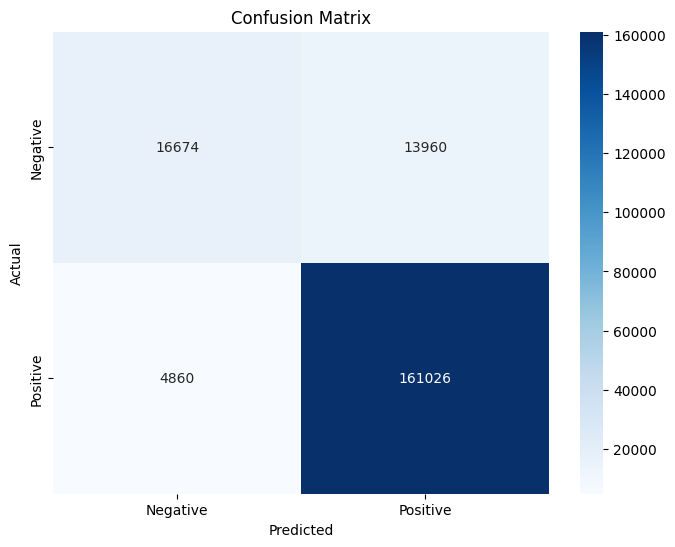

In [94]:
# I will use logistic regression model for binary classification.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predict the sentiment on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

# Plot the confusion matrix for visualization
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [ ]:
# According to the metrics summary above, The Logistic Regression model performs
# well on the test set with high accuracy, precision, recall, and F1 score.

# True Positives (Bottom-right): 161,026 positive reviews correctly classified.
# True Negatives (Top-left): 16,674 negative reviews correctly classified.
# False Positives (Bottom-left): 4,860 negative reviews incorrectly classified as positive.
# False Negatives (Top-right): 13960 positive reviews incorrectly classified as negative.

# Project Documentation: Sentiment Analysis of Amazon Kindle Reviews
The goal of this project is to develop a machine learning model to predict the sentiment (positive or negative) of Amazon Kindle reviews.

**Data Preprocessing**
Load Data: Read the dataset from a CSV file.
Handle Missing Values: Drop rows with missing values in the reviewText column to ensure data quality.
Helpful Column: Convert the helpful column from string representation of lists to two separate integer columns: helpful_votes and total_votes.
Sentiment Column: Created a binary sentiment column where ratings 4 and 5 are labeled as positive (1), and ratings 1, 2, and 3 are labeled as negative (0).
Text Preprocessing: Processed the reviewText to remove punctuation, convert to lowercase, tokenize, and remove stopwords using a custom function.

**Feature Extraction**
Used the TF-IDF vectorizer to convert the preprocessed review text into numerical features. Limited to the top 5000 features to reduce dimensionality and computation time.

**Model Selection and Training**
Model: Selected Logistic Regression for its simplicity and effectiveness in binary classification tasks.
Training: Trained the model on 80% of the data, holding out 20% for testing.

**Evaluation**
Metrics: Evaluated the model using accuracy, precision, recall, and F1-score to ensure a comprehensive understanding of performance.
Confusion Matrix: Visualized the confusion matrix to analyze true positives, true negatives, false positives, and false negatives.

**Results**
Accuracy: 0.90
Precision: 0.92
Recall: 0.97
F1 Score: 0.94
The confusion matrix showed that the model correctly classified most reviews with a small number of false positives and false negatives.
---
**Thought Process and Justifications**
Preprocessing: Essential to clean and prepare the data for accurate model training. Handling missing values ensures that the model is not trained on incomplete data, which can lead to biased results.
Helpful Column Transformation: Parsing this column correctly provides additional features that could be useful for further analysis, though not used directly in this model.
Binary Sentiment: Simplifies the classification task and aligns with common practices in sentiment analysis.
TF-IDF Vectorizer: Chosen for its effectiveness in text feature extraction by considering the importance of words relative to the document.
Logistic Regression: A well-understood, interpretable, and effective model for binary classification, providing a good balance between performance and simplicity.
Evaluation Metrics: Multiple metrics ensure a well-rounded evaluation, capturing different aspects of model performance beyond simple accuracy.
---
**Conclusion**
The project successfully developed a machine learning model that predicts the sentiment of Amazon Kindle reviews with high accuracy and precision. The steps taken ensured that the data was well-prepared and that the model was appropriately evaluated, providing reliable results for potential deployment in analyzing customer feedback.

This documentation provides a clear and concise overview of the project, including the rationale behind each step and the final outcomes.